## Лабораторная работа №1 | Вариант 5

Выполнил: Васильев Даниил

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
rgba = np.dtype([('R', np.uint8), ('G', np.uint8), ('B', np.uint8), ('A', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
import warnings
warnings.filterwarnings("ignore")

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
np.sort(np.random.rand(10))

array([0.04162526, 0.08234551, 0.1645021 , 0.53751192, 0.55077113,
       0.61860698, 0.74938818, 0.80242315, 0.92429404, 0.99734793])

5. Создайте read-only массив(неизменяемый)

In [7]:
np.arange(10).flags.writeable = False

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [8]:
cartesian_coords = np.random.rand(10, 2)

x = cartesian_coords[:, 0]
y = cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coords = np.column_stack((r, theta))

print(polar_coords)

[[0.77839532 0.09021429]
 [0.8028349  1.18280438]
 [1.05378836 0.54980078]
 [1.06557518 0.43179975]
 [0.91027254 1.00310192]
 [0.73616578 0.36825867]
 [0.37921979 0.61004282]
 [0.12887213 0.76274982]
 [0.8140389  1.31692657]
 [0.57743976 1.11295962]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [9]:
num_points = 10 
coords = np.recarray(num_points, dtype=[('x', np.float64), ('y', np.float64)])

coords['x'] = np.random.rand(num_points)
coords['y'] = np.random.rand(num_points)

coords

rec.array([(0.3328577 , 0.11396962), (0.56984927, 0.78084626),
           (0.68702397, 0.63733792), (0.91665635, 0.82703664),
           (0.60177208, 0.34981399), (0.69681842, 0.52304914),
           (0.45023964, 0.71252273), (0.69090611, 0.68152064),
           (0.50022102, 0.51759677), (0.22717028, 0.36405632)],
          dtype=[('x', '<f8'), ('y', '<f8')])

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [10]:
x = np.random.normal(size=5)
y = np.random.normal(size=5)
1 / (x[:, np.newaxis] - y[np.newaxis, :])

array([[-1.40857322, -0.72616993, -0.99734221, -0.40105994, -0.36005937],
       [ 0.63554519,  1.10338455,  0.78080737, -4.7618503 , -2.02458124],
       [ 1.22341817,  6.65636662,  1.90601304, -1.03511886, -0.8000003 ],
       [-0.78825842, -0.51659046, -0.64047297, -0.32764604, -0.2997601 ],
       [ 1.79782885, -9.01522802,  3.79506867, -0.8148444 , -0.66174546]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [11]:
a = np.random.rand(5).astype(np.float32)
print(a)
a.dtype = np.int32
a

[0.92162246 0.31873813 0.2144264  0.5943972  0.5636873 ]


array([1064038259, 1050882469, 1046188696, 1058548330, 1058033104],
      dtype=int32)

10. Как случайно заменить p элементов в 2D массиве?

In [12]:
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

p = 4

rows, cols = array_2d.shape
random_indices = np.random.choice(rows * cols, size=p, replace=False)

random_rows = random_indices // cols
random_cols = random_indices % cols

new_values = np.random.randint(10, 20, size=p)  # Новые значения для замены
array_2d[random_rows, random_cols] = new_values
array_2d

array([[ 1, 12,  3],
       [13,  5, 12],
       [16,  8,  9]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [15]:
df.shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [16]:
df['Age'].median(), df['Age'].mean()

(28.0, 29.69911764705882)

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [17]:
kids = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]

kids[kids['Survived'] == 1].shape[0] / kids.shape[0] * 100, \
    adults[adults['Survived'] == 1].shape[0] / adults.shape[0] * 100

(59.036144578313255, 38.193343898573694)

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [18]:
women_and_kids = df[(df['Age'] < 18) | (df['Sex'] == 'female')]
men = df[df['Sex'] == 'male']

women_and_kids[women_and_kids['Survived'] == 1].shape[0] / women_and_kids.shape[0] * 100 > \
    men[men['Survived'] == 1].shape[0] / men.shape[0] * 100

True

5. Зависит ли выживаемость от класса обслуживания?

In [19]:
df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

6. Посчитайте средний возраст умерших женщин и мужчин

In [23]:
df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'].mean(), \
    df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'].mean(), 

(31.618055555555557, 25.046875)

7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [21]:
not_alone = df[df['SibSp'] + df['Parch'] >= 1]
alone = df[df['SibSp'] + df['Parch'] < 1]

not_alone[not_alone['Survived'] == 1].shape[0] / not_alone.shape[0] * 100, \
    alone[alone['Survived'] == 1].shape[0] / alone.shape[0] * 100

(50.56497175141242, 30.353817504655495)

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [22]:
df[df['Survived'] == 1]['Fare'].mean(), df[df['Survived'] == 0]['Fare'].mean()

(48.39540760233918, 22.117886885245902)

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [24]:
df[df['Pclass'] == 2]['Age'].max(), df[df['Pclass'] == 2]['Age'].min()

(70.0, 0.67)

10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [26]:
young_men = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] <= 30)]
older_men = df[(df['Sex'] == 'male') & (df['Age'] > 30)]

young_men[young_men['Survived'] == 1].shape[0] / young_men.shape[0] * 100 > \
    older_men[older_men['Survived'] == 1].shape[0] / older_men.shape[0] * 100

False

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

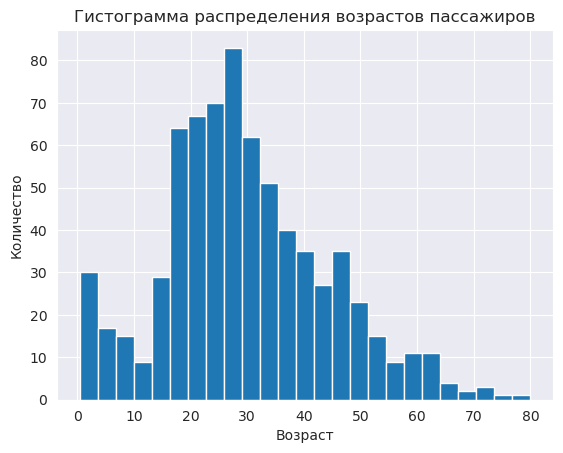

In [33]:
plt.hist(df['Age'], bins=25)
plt.title('Гистограмма распределения возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

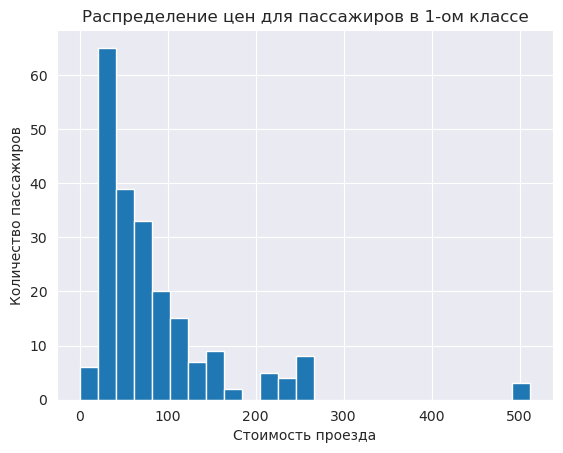

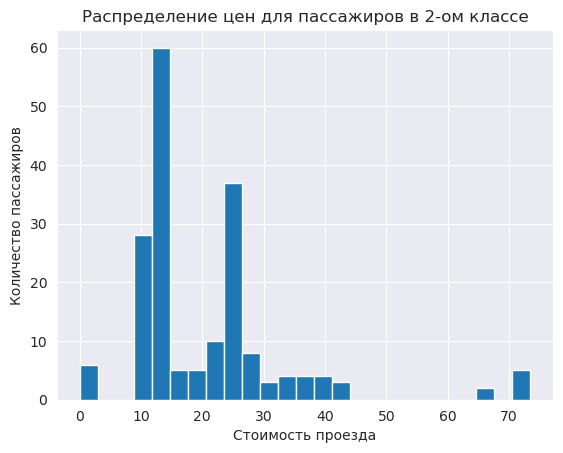

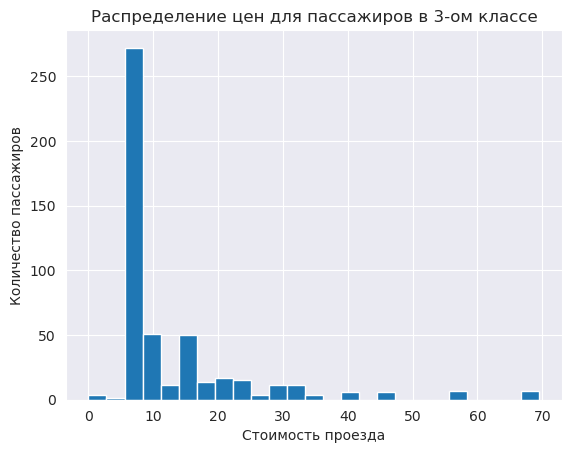

In [34]:
for i in range(1, 4):
    plt.hist(df[df['Pclass'] == i]['Fare'].dropna(), bins=25)
    plt.xlabel('Стоимость проезда')
    plt.ylabel('Количество пассажиров')
    plt.title(f'Распределение цен для пассажиров в {i}-ом классе')
    plt.show()

3. Постройте зависимость цены от возраста пассажира

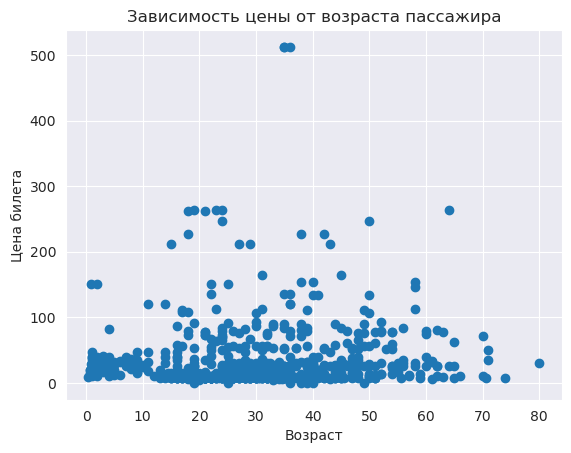

In [39]:
plt.scatter(df['Age'], df['Fare'])
plt.title('Зависимость цены от возраста пассажира')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

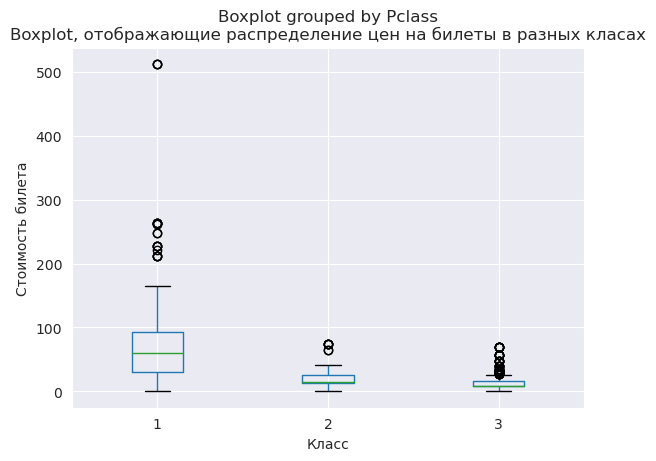

In [42]:
df.boxplot(column='Fare', by='Pclass')
plt.title('Boxplot, отображающие распределение цен на билеты в разных класах')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

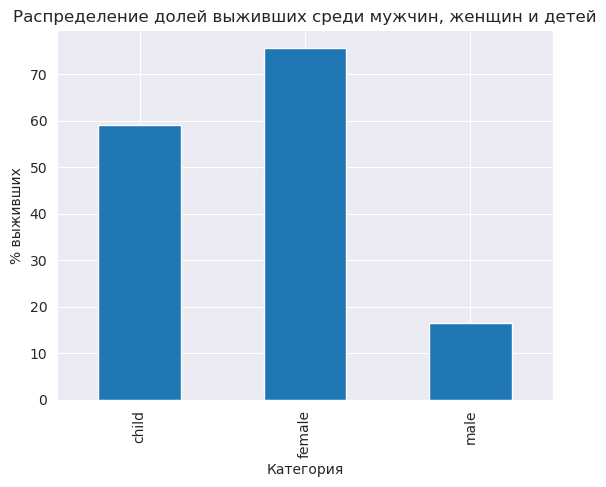

In [43]:
df['Category'] = df.apply(lambda row: 'child' if row['Age'] < 16 else row['Sex'], axis=1)
(df.groupby('Category')['Survived'].mean() * 100).plot(kind='bar')
plt.title('Распределение долей выживших среди мужчин, женщин и детей')
plt.xlabel('Категория')
plt.ylabel('% выживших')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

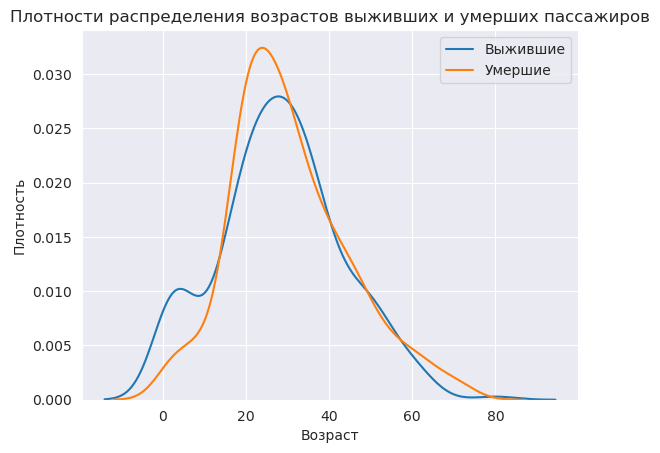

In [47]:
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), label='Выжившие')
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), label='Умершие')

plt.title('Плотности распределения возрастов выживших и умерших пассажиров')
plt.ylabel('Плотность')
plt.xlabel('Возраст')

plt.legend()
plt.show()

# вывод: на корабле было много 20-30 летних, престарелые люди не выжили, детей спасали первыми

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

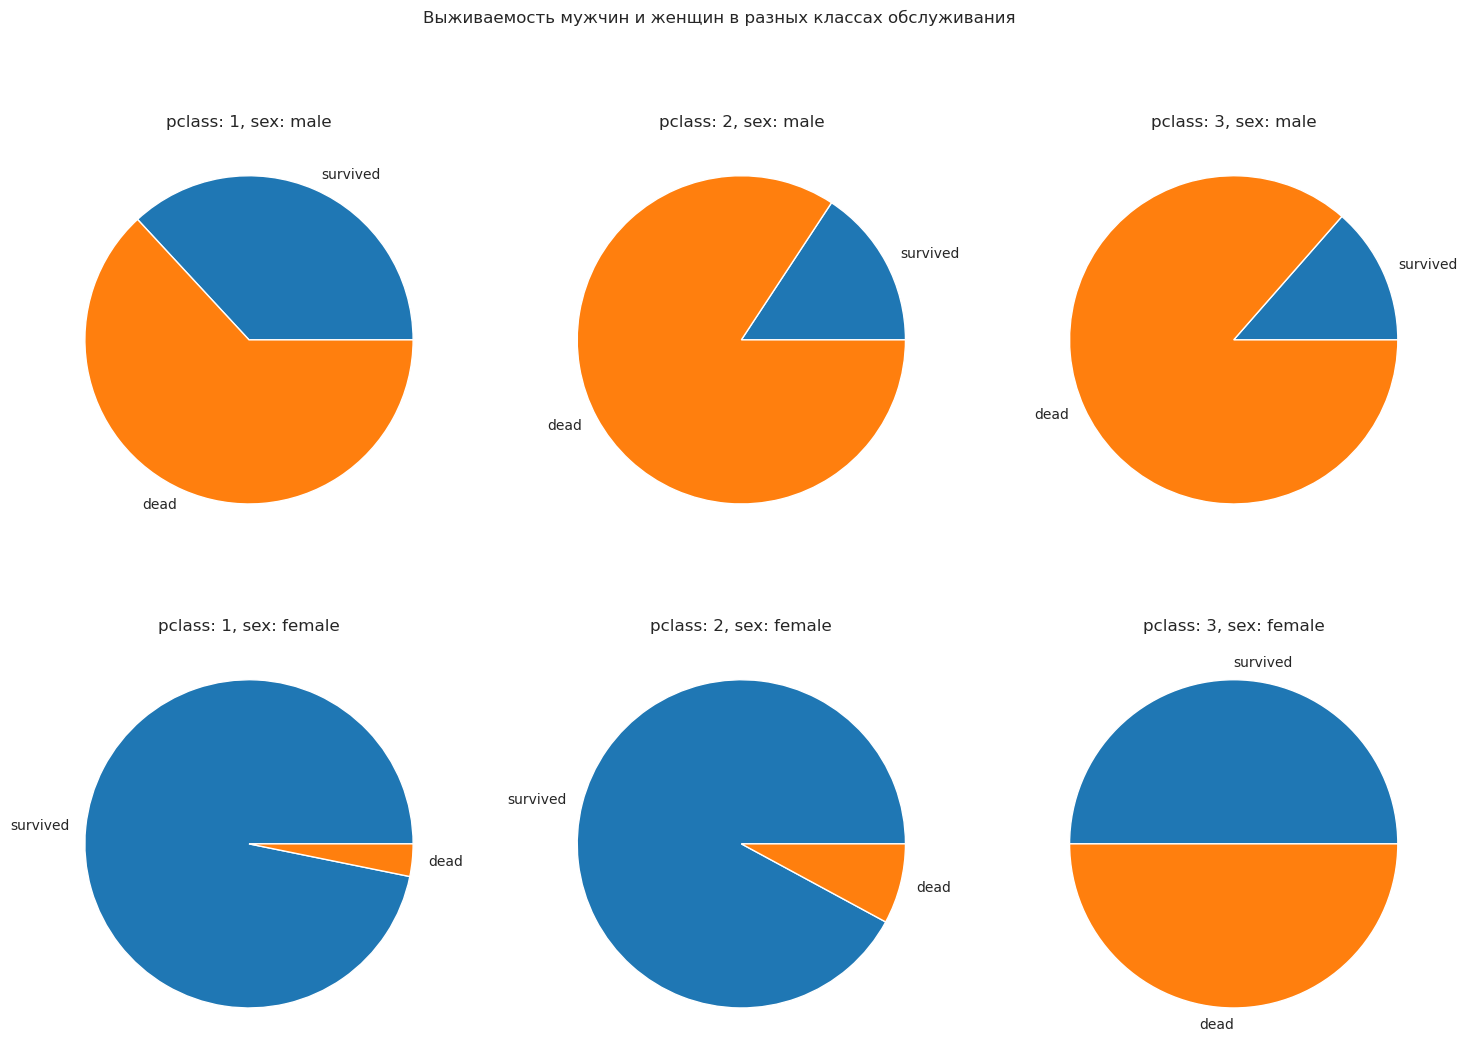

In [52]:
survival_by_class_sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

survival_by_class_sex['Survived_Percent'] = survival_by_class_sex[1] / (survival_by_class_sex[0] + survival_by_class_sex[1]) * 100
survival_by_class_sex['Deceased_Percent'] = survival_by_class_sex[0] / (survival_by_class_sex[0] + survival_by_class_sex[1]) * 100

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Выживаемость мужчин и женщин в разных классах обслуживания')

for i, pclass in enumerate([1, 2, 3]):
    for j, sex in enumerate(['male', 'female']):
        ax = axes[j, i]
        data = survival_by_class_sex.loc[(pclass, sex)]
        ax.pie(data[['Survived_Percent', 'Deceased_Percent']].values.flatten(), labels=['survived', 'dead'])
        ax.set_title(f'pclass: {pclass}, sex: {sex}')

plt.show()